# Coordinate Descent (CoD) for Sparse Recovery
Python implementation corresponding to the provided MATLAB code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import idct

In [2]:
# Parameters
n = 128      # length of the signal
m = 64       # number of measurements
K = 5        # number of sparse coefficients
alpha = 0.05 # threshold for sparsity
num_iter = 50 # number of iterations

# True sparse signal
z_true = np.zeros((n, 1))
idx = np.random.permutation(n)[:K]
z_true[idx, 0] = np.random.randn(K)

# DCT basis
Psi = idct(np.eye(n), norm='ortho')
x = Psi @ z_true  # real signal

# Gaussian noise
snr = 10
s_p = np.linalg.norm(x)**2 / m
n_p = s_p / (10**(snr/10))
noise = np.sqrt(n_p) * np.random.randn(m, 1)

# Measurement matrix
Phi = np.random.randn(m, n)
Phi = Phi / np.linalg.norm(Phi, axis=1, keepdims=True)

# Measurements
y = Phi @ x + noise

# Dictionary for CoD
theta = Phi @ Psi

In [3]:
# Coordinate Descent Algorithm
z = np.zeros((n, 1))
B = theta.T @ y  # Initial coefficients
S = np.eye(n) - theta.T @ theta  # Residual matrix

mse_history = np.zeros(num_iter)

for t in range(num_iter):
    z_bar = np.sign(B) * np.maximum(np.abs(B) - alpha, 0)
    k = np.argmax(np.abs(z - z_bar))
    delta = z_bar[k, 0] - z[k, 0]
    B = B + S[:, [k]] * delta
    z[k, 0] = z_bar[k, 0]
    x_rec_iter = Psi @ z
    mse_history[t] = np.mean((x - x_rec_iter) ** 2)

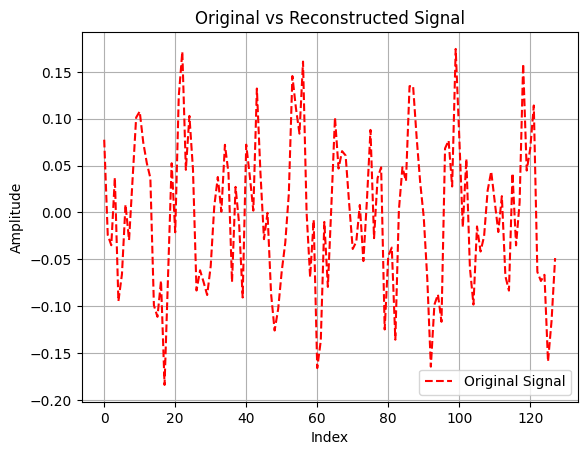

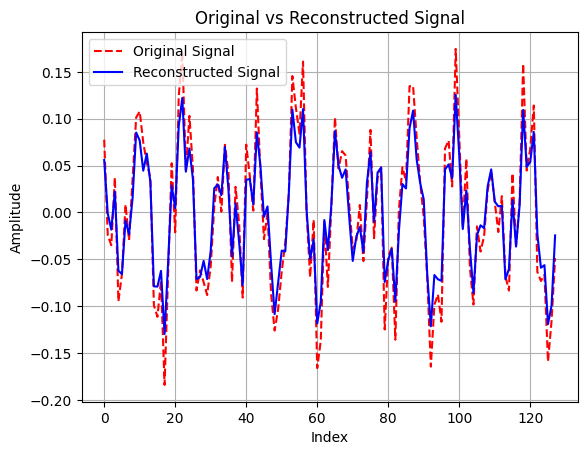

In [4]:
# Final reconstruction
x_rec = Psi @ z

# plot original signal
plt.figure()
plt.plot(x, 'r--', label='Original Signal')
plt.legend()
plt.title('Original vs Reconstructed Signal')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot original vs reconstructed signal
plt.figure()
plt.plot(x, 'r--', label='Original Signal')
plt.plot(x_rec, 'b-', label='Reconstructed Signal')
plt.legend()
plt.title('Original vs Reconstructed Signal')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

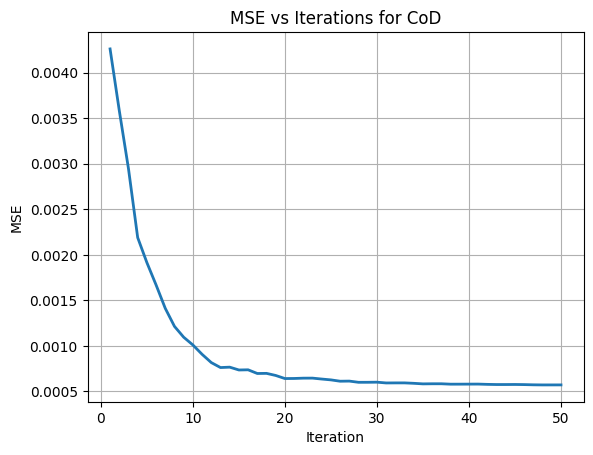

In [5]:
# Plot MSE vs Iterations
plt.figure()
plt.plot(np.arange(1, num_iter+1), mse_history, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs Iterations for CoD')
plt.grid(True)
plt.show()